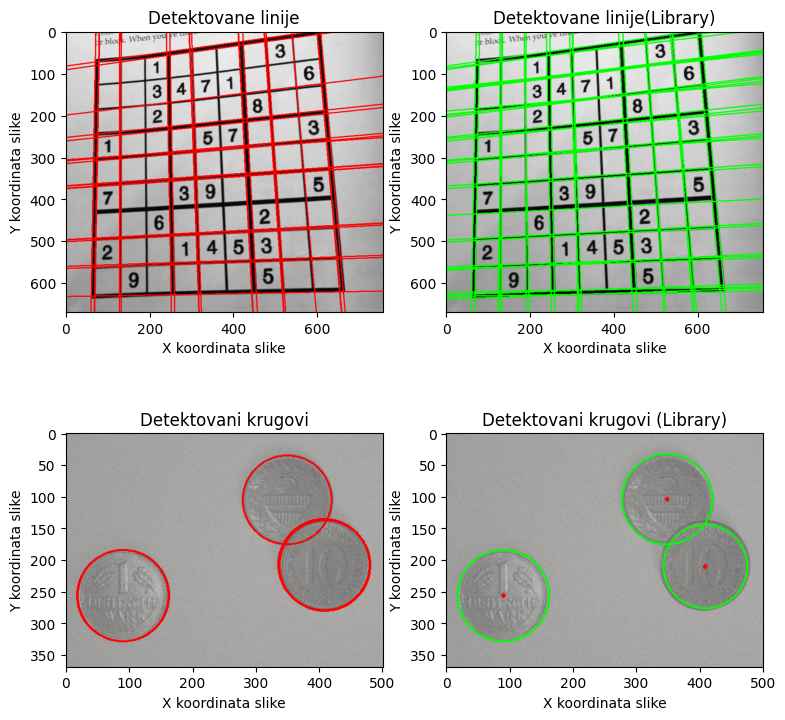

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hough_transform_lines(image, threshold=0.5, rho_resolution=1, theta_resolution=np.pi/180):

    #Prebacivanje u GRAYSCALE
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Koriscenje Kenijevog filtera
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    #Namestanje parametara
    height, width = edges.shape
    max_rho = int(np.sqrt(height**2 + width**2))
    rhos = np.arange(-max_rho, max_rho + 1, rho_resolution)
    thetas = np.arange(-np.pi/2, np.pi/2 + theta_resolution, theta_resolution)

    #Generisanje matrice "accumulator" sa vrednostima nula 
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint)

    edge_points = np.argwhere(edges > 0)

    #Popunjavanje akumulatora na osnovu jednacine prave
    for y, x in edge_points:
        for theta_idx in range(len(thetas)):
            theta = thetas[theta_idx]
            rho = int(x * np.cos(theta) + y * np.sin(theta))
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, theta_idx] += 1

    #Crtanje linija
    max_accumulator = np.max(accumulator)
    lines = np.argwhere(accumulator >= threshold * max_accumulator)
    detected_lines = []
    for line in lines:
        rho_idx, theta_idx = line
        rho = rhos[rho_idx]
        theta = thetas[theta_idx]
        detected_lines.append((rho, theta))


    for rho, theta in detected_lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


    return image


def hough_transform_circles(imagec, threshold=0.9, min_radius=64, max_radius=72):

    #Prebacivanje u GRAYSCALE
    gray_image = cv2.cvtColor(imagec, cv2.COLOR_BGR2GRAY)

    #Koriscenje Kenijevog filtera
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

    #Generisanje matrice "accumulator" sa vrednostima nula 
    accumulator = np.zeros((edges.shape[0],edges.shape[1], (max_radius - min_radius) + 1))

    #Popunjavanje akumulatora na osnovu jednacine kruga
    edge_points = np.argwhere(edges > 0)
    for y, x in edge_points:
        for radius in range(min_radius, max_radius + 1):
            for theta in np.linspace(0, 2 * np.pi, 360):
                a = int(x - radius * np.cos(theta))
                b = int(y - radius * np.sin(theta))
                if 0 <= a < edges.shape[1] and 0 <= b < edges.shape[0]:
                    accumulator[b, a, radius - min_radius] += 1


    #Izdvajanje centar kruga na osnovu threshold-a
    max_accumulator = np.max(accumulator)
    found_circles = np.argwhere(accumulator >= threshold * max_accumulator)

    #Crtanje krugova
    for circle in found_circles:
        cv2.circle(imagec, (circle[1], circle[0]), circle[2] + min_radius, (0, 0, 255), 2)

    return imagec


#Hafova transformacija za linije koriscenjem biblioteke
def HoughFunc(imageH):
    gray = cv2.cvtColor(imageH, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

    imageH_copy = np.copy(imageH)
    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*r
        y0 = b*r

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(imageH, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return imageH

#Hafova transformacija za krugove koriscenjem biblioteke
def HoughFuncCircle(imageHc):
    gray = cv2.cvtColor(imageHc, cv2.COLOR_BGR2GRAY)
    
    
    circles = cv2.HoughCircles(gray ,cv2.HOUGH_GRADIENT,1,100, param1=50,param2=40,minRadius=64,maxRadius=76)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(imageHc,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(imageHc,(i[0],i[1]),2,(0,0,255),3)

    return imageHc


#Ucitavanje slika
image_path = "D:\PythonProjects\data\data\Screenshot_7.png"
image = cv2.imread(image_path)
image_pathc = "D:\PythonProjects\data\data\SlikaNovcici.jpg"
imagec = cv2.imread(image_pathc)
image_pathH = "D:\PythonProjects\data\data\Screenshot_7.png"
imageH = cv2.imread(image_pathH)
image_pathHc = "D:\PythonProjects\data\data\SlikaNovcici.jpg"
imageHc = cv2.imread(image_pathHc)

#Hafova Transformacija
lines_image = hough_transform_lines(image, threshold=0.4, rho_resolution=1, theta_resolution=np.pi/180)
circles_image = hough_transform_circles(imagec, threshold=0.92, min_radius=64, max_radius=72)
HoughLines_image = HoughFunc(imageH)
HoughCircle_image = HoughFuncCircle(imageHc)

#Prikazivanje rezultata
plt.figure(figsize=(9, 9))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB))
plt.title("Detektovane linije")
plt.xlabel("X koordinata slike")
plt.ylabel("Y koordinata slike")
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(HoughLines_image, cv2.COLOR_BGR2RGB))
plt.title("Detektovane linije(Library)")
plt.xlabel("X koordinata slike")
plt.ylabel("Y koordinata slike")
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB))
plt.title("Detektovani krugovi")
plt.xlabel("X koordinata slike")
plt.ylabel("Y koordinata slike")
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(HoughCircle_image, cv2.COLOR_BGR2RGB))
plt.title("Detektovani krugovi (Library)")
plt.xlabel("X koordinata slike")
plt.ylabel("Y koordinata slike")
plt.show()
